In [1]:
import segyio
import numpy as np
from scipy.interpolate import RegularGridInterpolator
import matplotlib.pyplot as plt

In [2]:
def load_parameters(
    path_rho,
    path_vp,
    path_vs
):
    # subsample range, the shape of original data is (13601, 2801) 
    row_range = range(2500, 12000)
    col_range = range(700, 2300)
    with (segyio.open(path_rho, strict=False) as f_rho, 
          segyio.open(path_vp, strict=False) as f_vp, 
          segyio.open(path_vs, strict=False) as f_vs
         ):
        rho = tuple()
        vp = tuple()
        vs = tuple()
        for row in range(2500, 12000):
            rho += (f_rho.trace[row][col_range], )
            vp += (f_vp.trace[row][col_range], )
            vs += (f_vs.trace[row][col_range], )
        rho = np.vstack(rho).T
        vp = np.vstack(vp).T
        vs = np.vstack(vs).T
    return rho, vp, vs

In [3]:
path_rho = 'MODEL_DENSITY_1.25m.segy'
path_vp = 'MODEL_P-WAVE_VELOCITY_1.25m.segy'
path_vs = 'MODEL_S-WAVE_VELOCITY_1.25m.segy'

In [4]:
rho, vp, vs = load_parameters(path_rho, path_vp, path_vs)

Text(0.5, 1.0, '$V_s$ in Marmousi2')

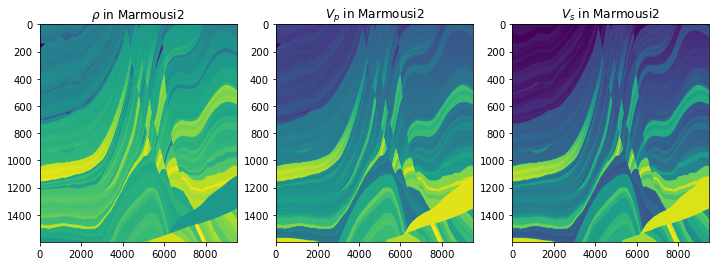

In [5]:
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.imshow(rho, aspect='auto')
plt.title(r'$\rho$ in Marmousi2')
plt.subplot(132)
plt.imshow(vp, aspect='auto')
plt.title(r'$V_p$ in Marmousi2')
plt.subplot(133)
plt.imshow(vs, aspect='auto')
plt.title(r'$V_s$ in Marmousi2')

In [6]:
print('rho in ({:.2f}, {:.2f})'.format(rho.min(), rho.max()))
print('vp in ({:.2f}, {:.2f})'.format(vp.min(), vp.max()))
print('vs in ({:.2f}, {:.2f})'.format(vs.min(), vs.max()))

rho in (1.59, 2.62)
vp in (1028.00, 4670.00)
vs in (382.52, 2729.00)


In [32]:
def subsample(data, nz, nx):
    x, y = np.arange(data.shape[1]), np.arange(data.shape[0])
    interp = RegularGridInterpolator((x, y), data.T)
    nptz = nz + 1
    nptx = nx + 1
    xx = np.arange(nptx) * ((data.shape[1]-1) // nx)
    zz = np.arange(nptz) * ((data.shape[0]-1) // nz)
    X, Z = np.meshgrid(xx, zz)
    xx = X.flatten()[:, np.newaxis]
    zz = Z.flatten()[:, np.newaxis]
    points = np.hstack((xx, zz))
    data_interp = interp(points).reshape(nptz, nptx)
    return data_interp

In [33]:
nz = 100
nx = 200
rho_interp = subsample(rho, nz, nx)
vp_interp = subsample(vp, nz, nx)
vs_interp = subsample(vs, nz, nx)

Text(0.5, 1.0, '$V_s$ in Marmousi2')

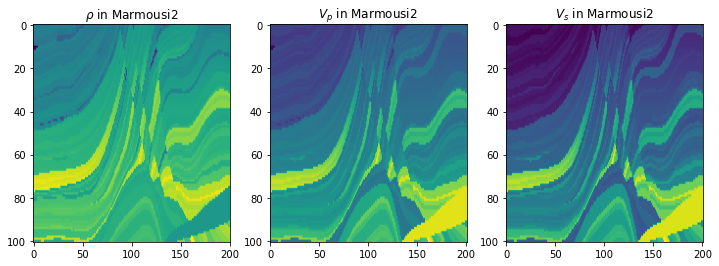

In [36]:
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.imshow(rho_interp, aspect='auto')
plt.title(r'$\rho$ in Marmousi2')
plt.subplot(132)
plt.imshow(vp_interp, aspect='auto')
plt.title(r'$V_p$ in Marmousi2')
plt.subplot(133)
plt.imshow(vs_interp, aspect='auto')
plt.title(r'$V_s$ in Marmousi2')